In [1]:
from typing_extensions import dataclass_transform
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv("training.csv")
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.0,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261


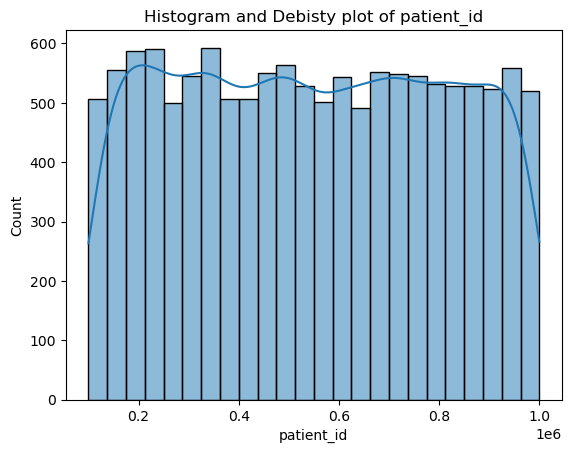

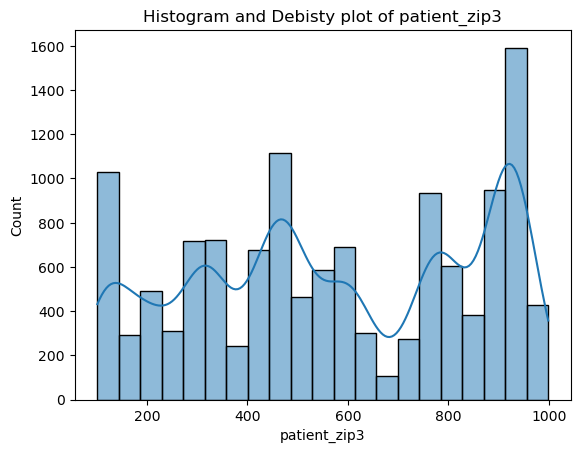

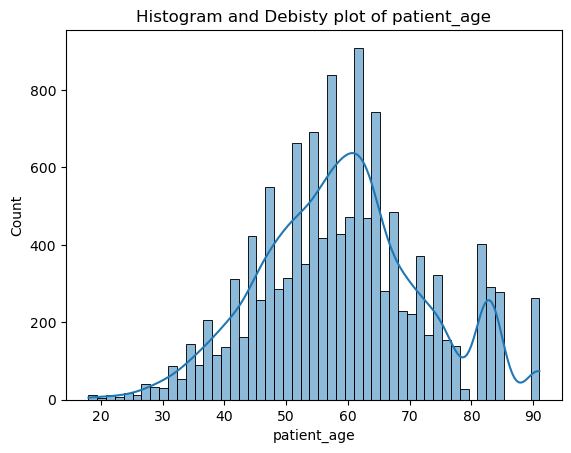

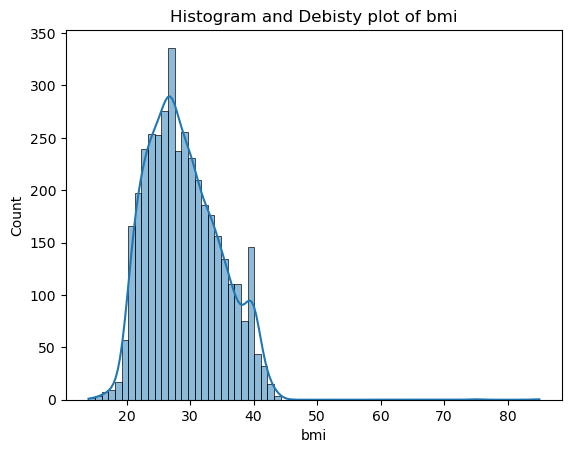

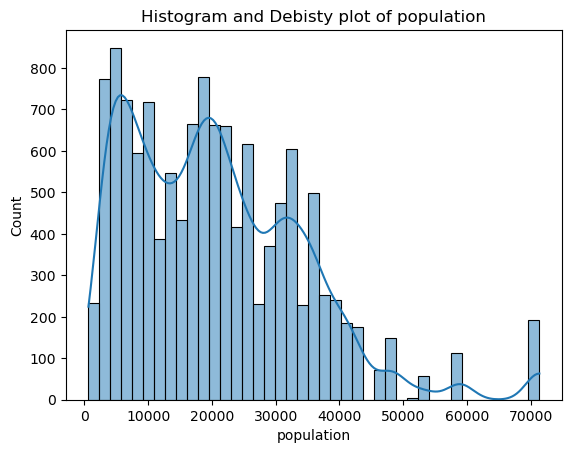

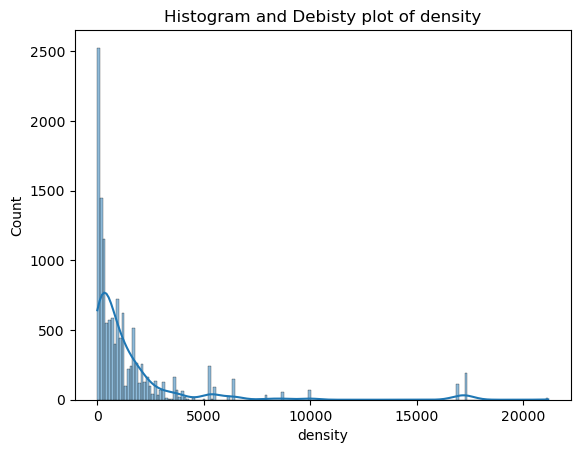

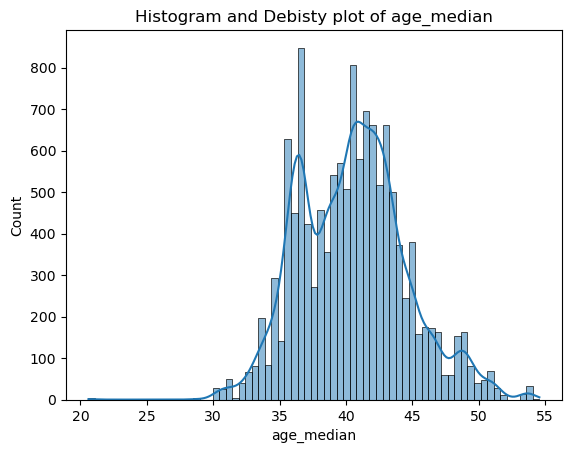

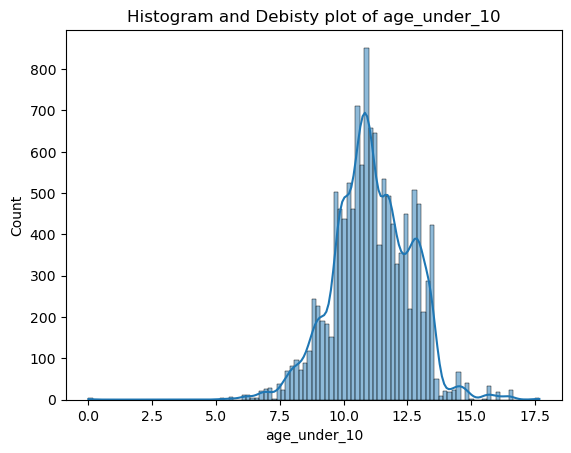

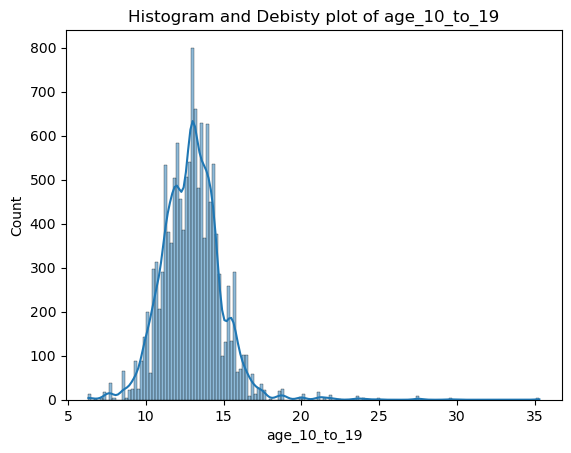

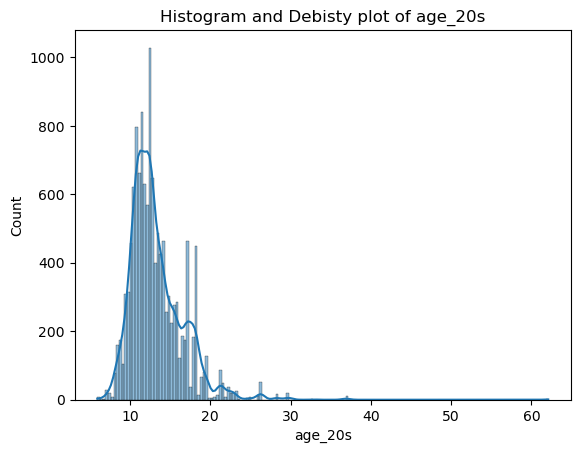

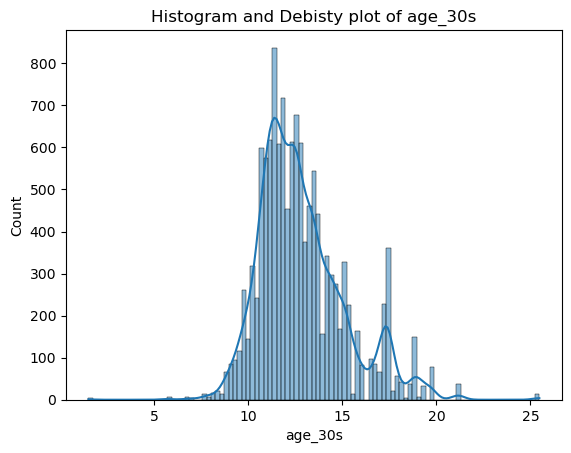

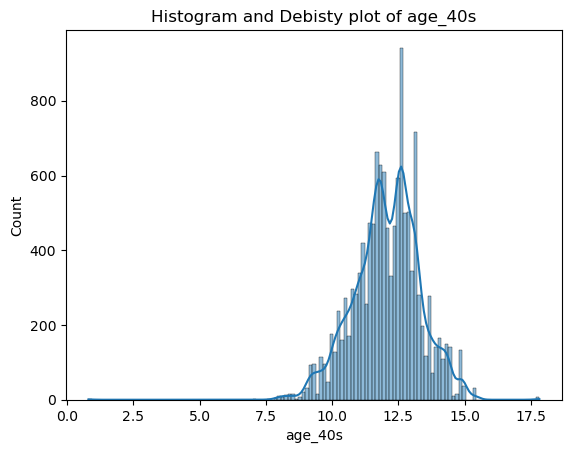

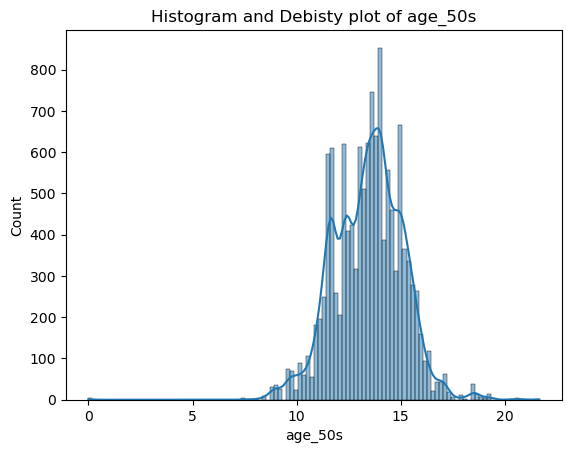

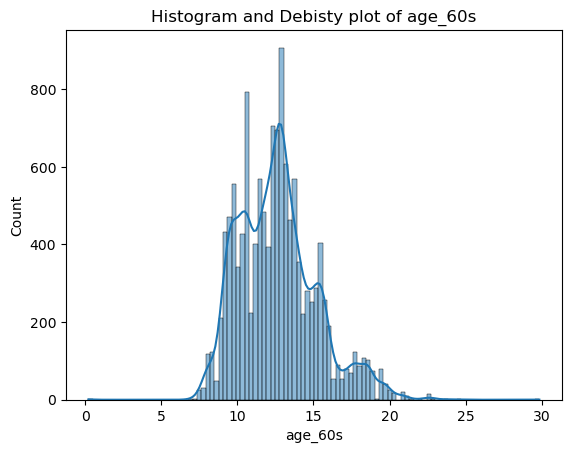

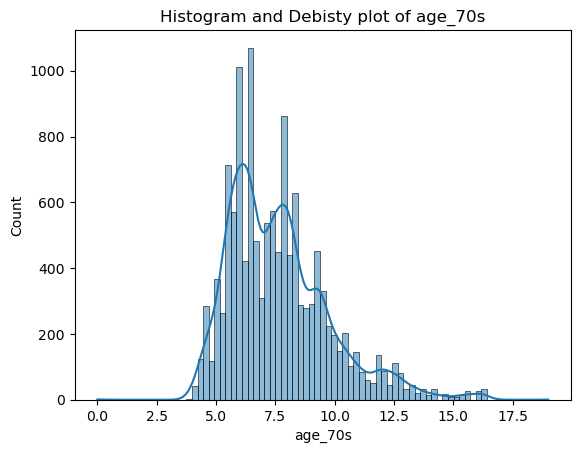

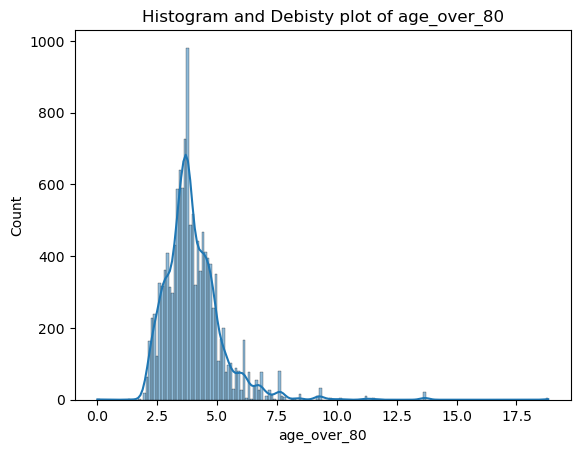

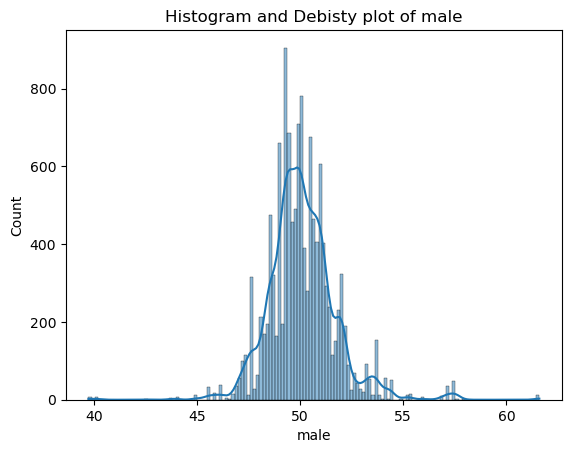

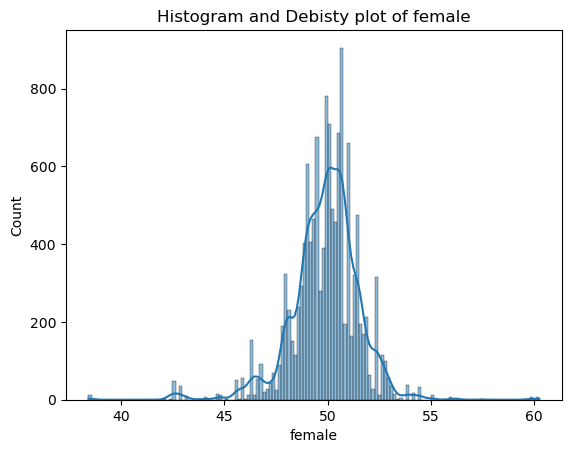

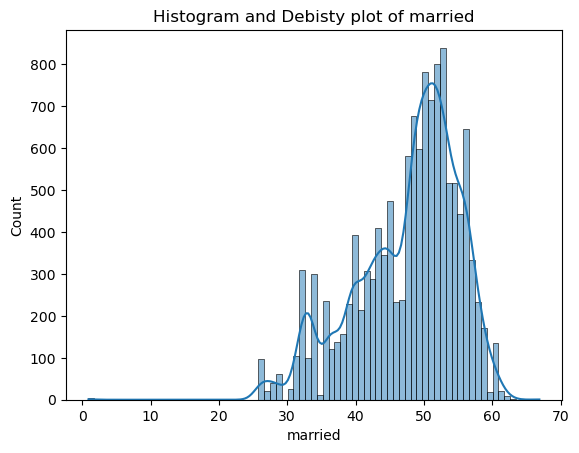

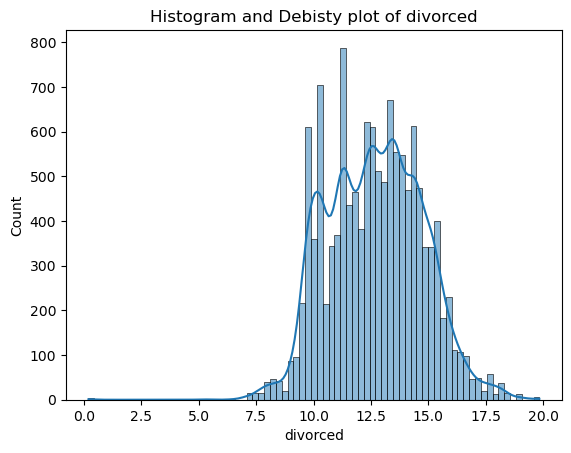

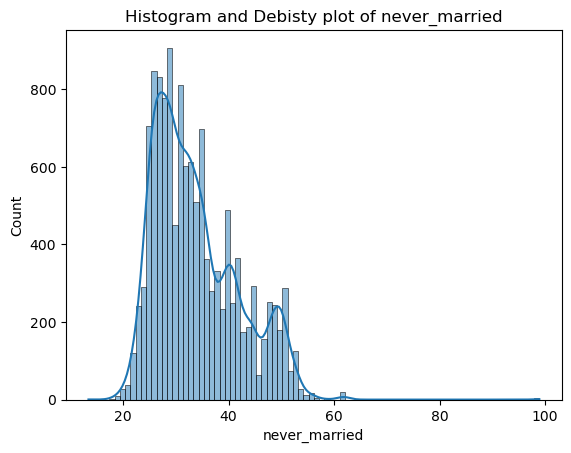

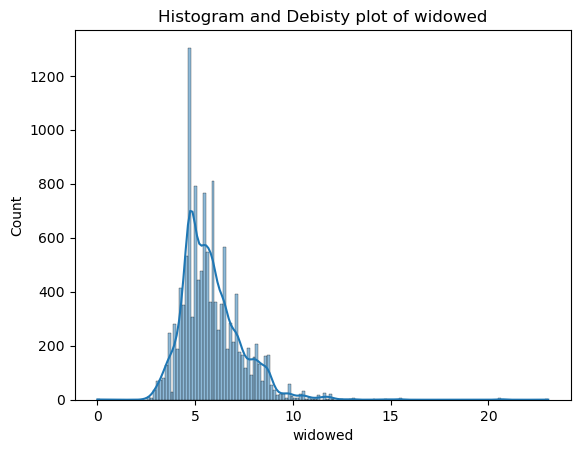

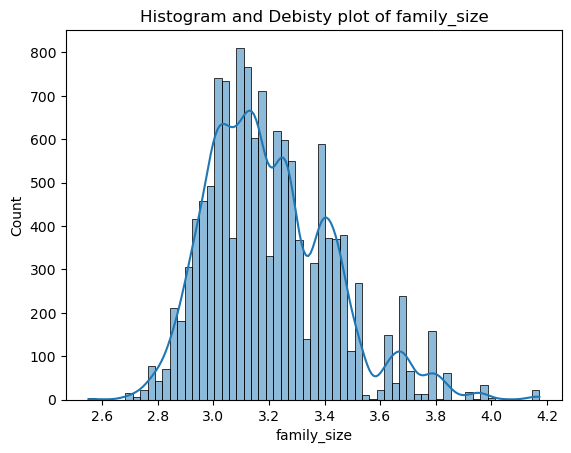

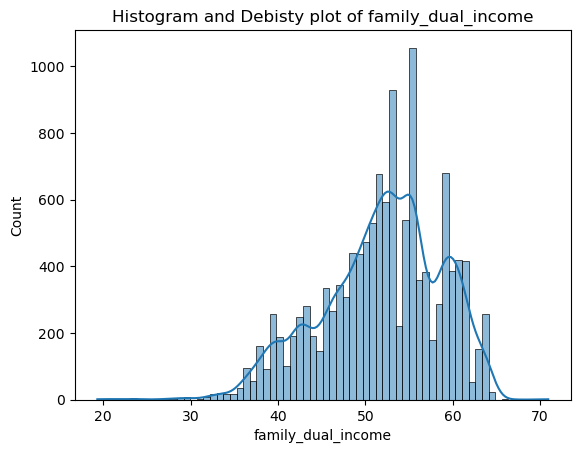

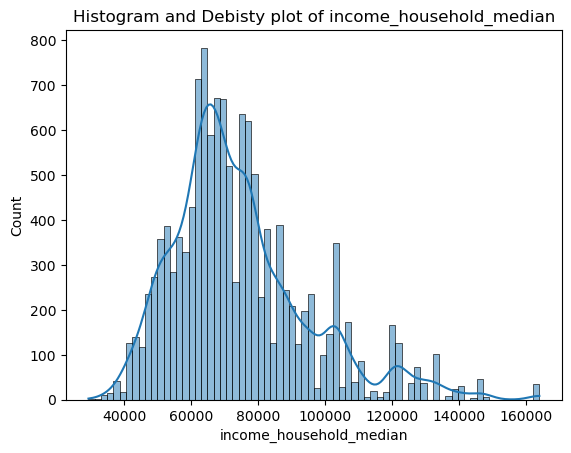

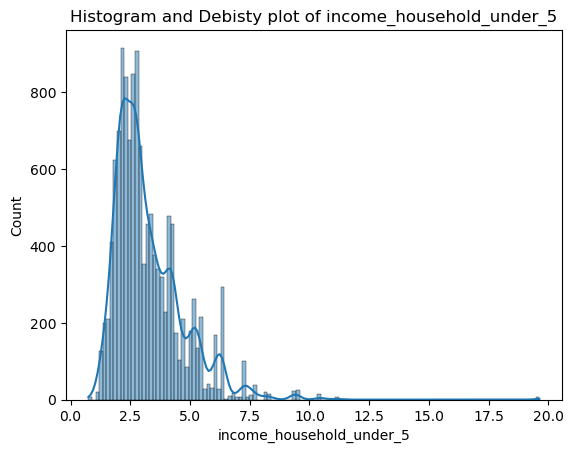

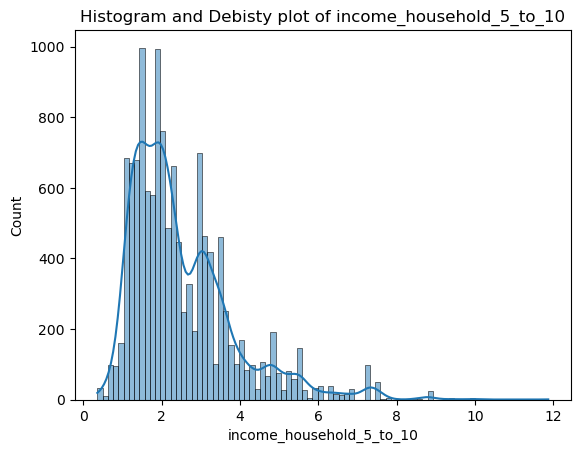

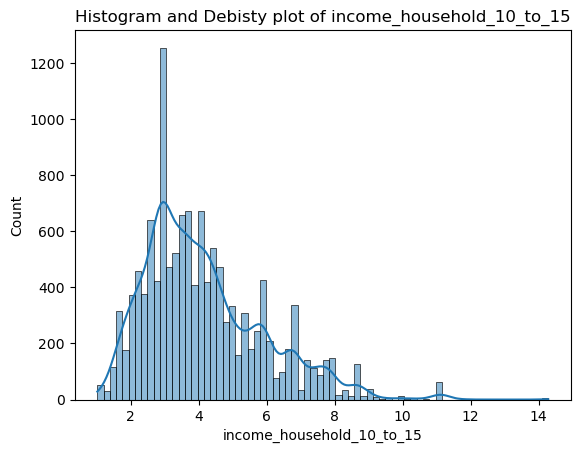

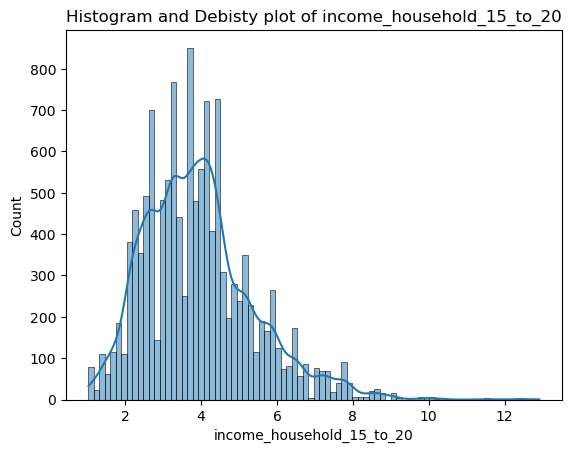

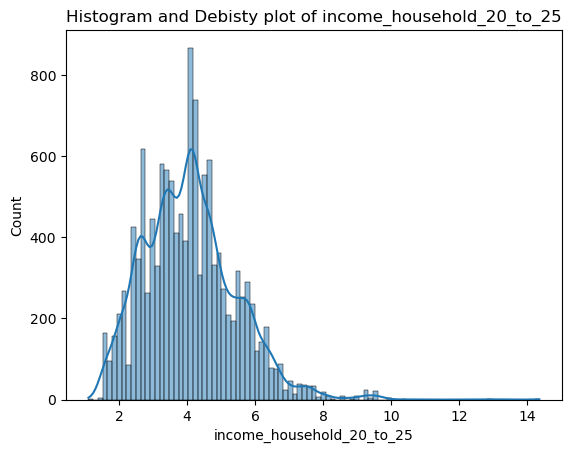

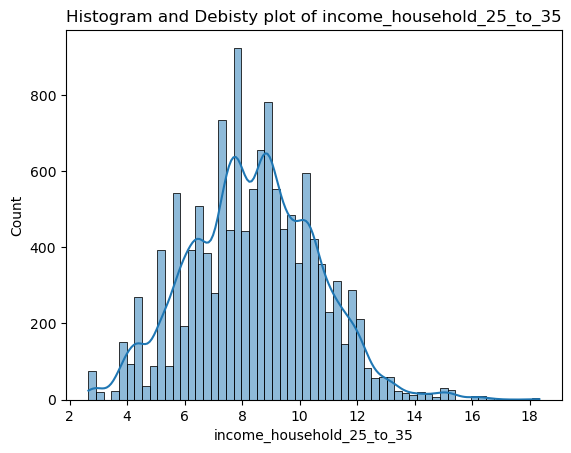

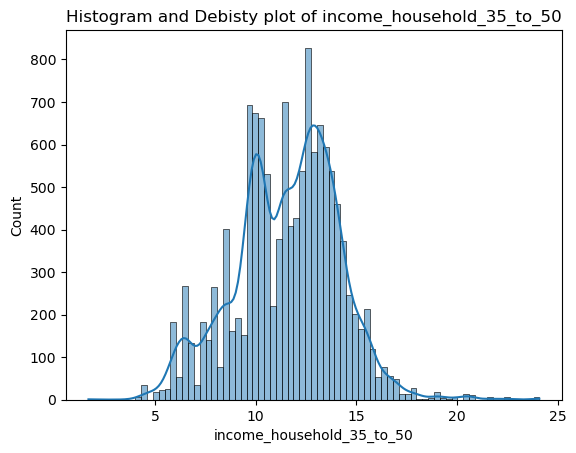

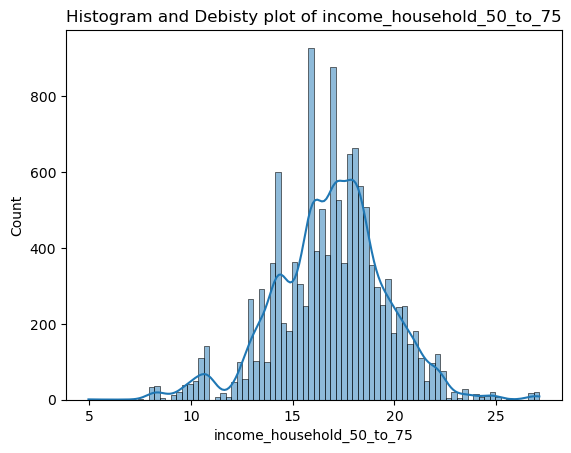

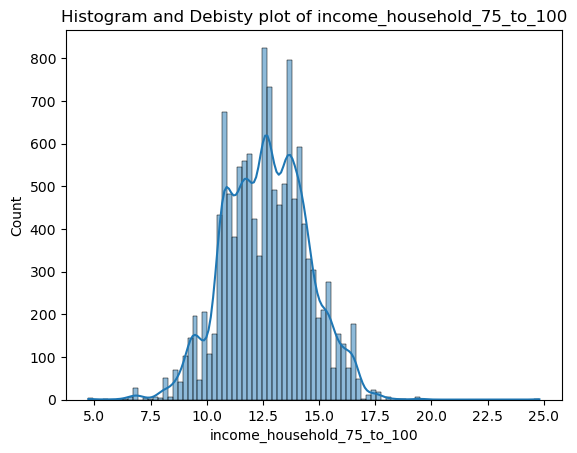

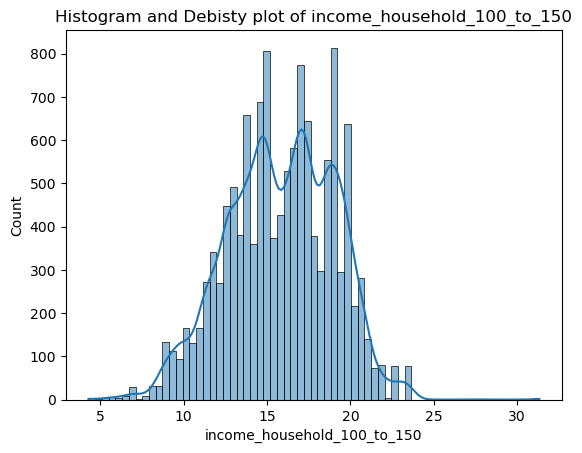

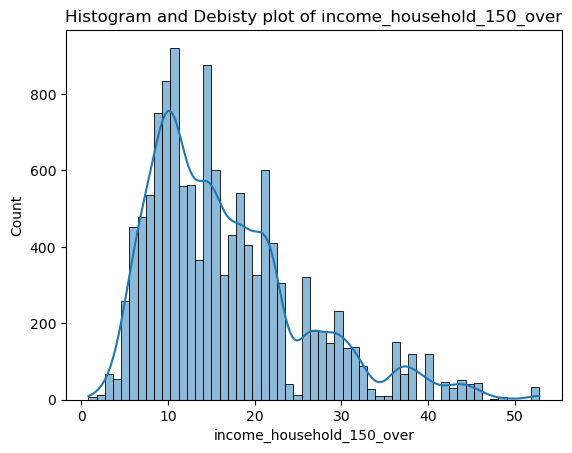

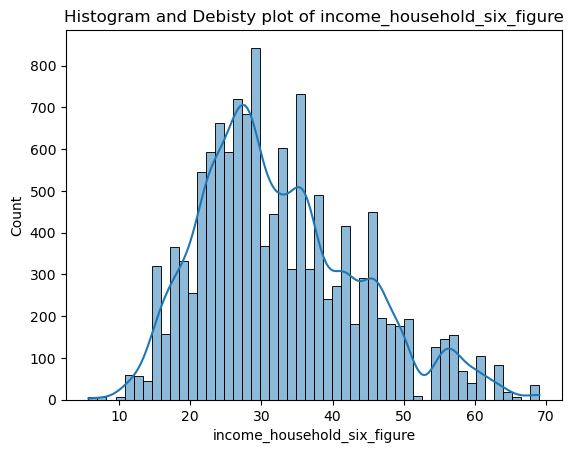

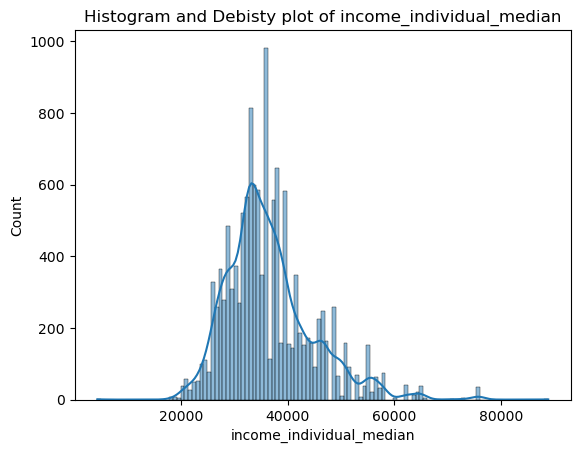

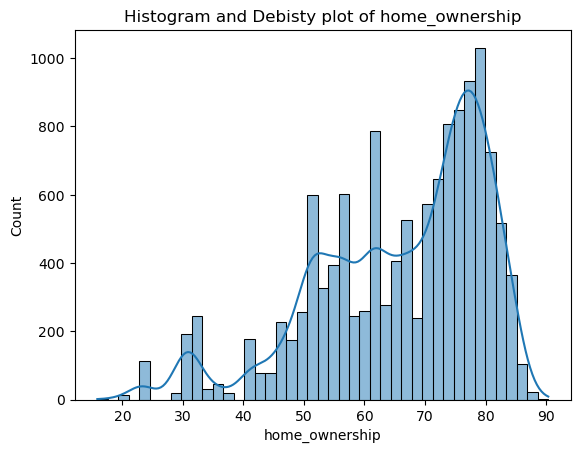

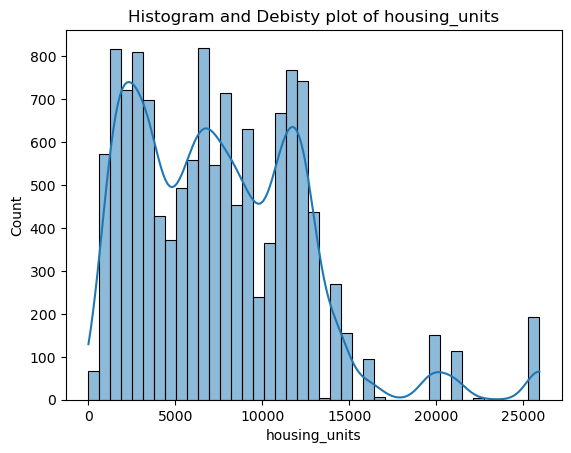

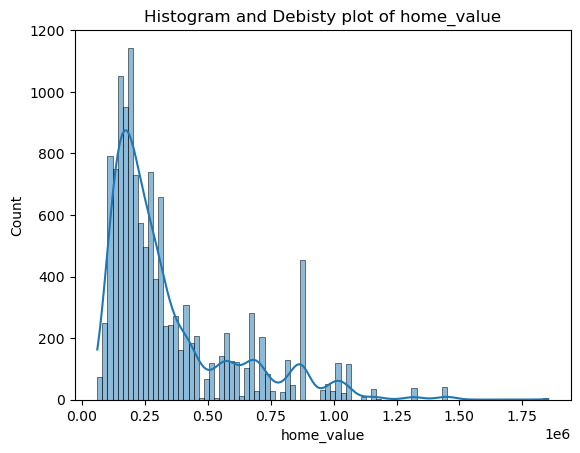

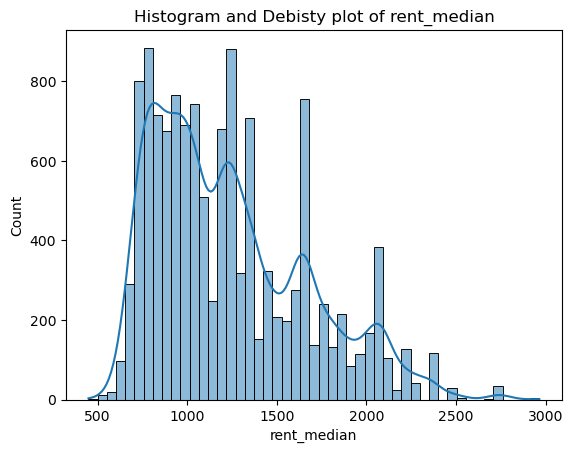

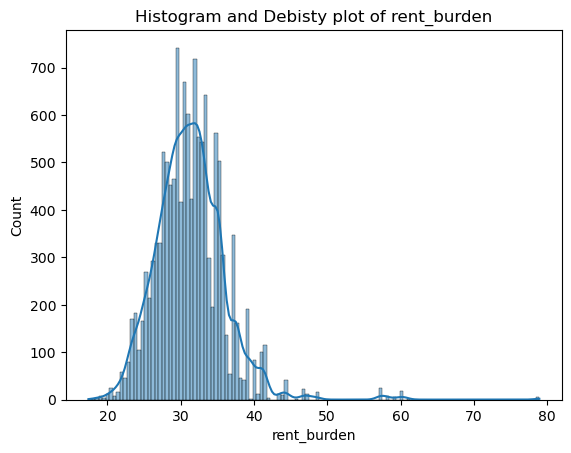

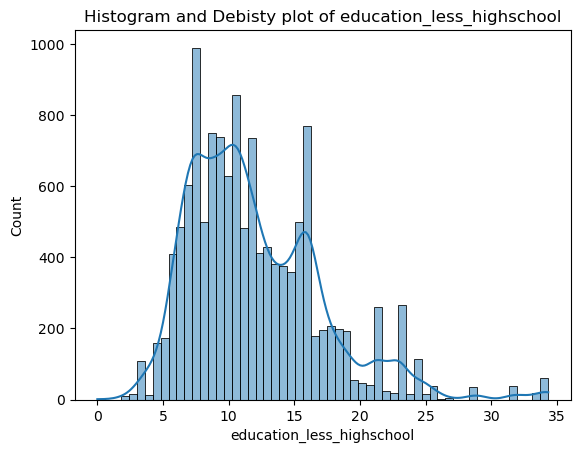

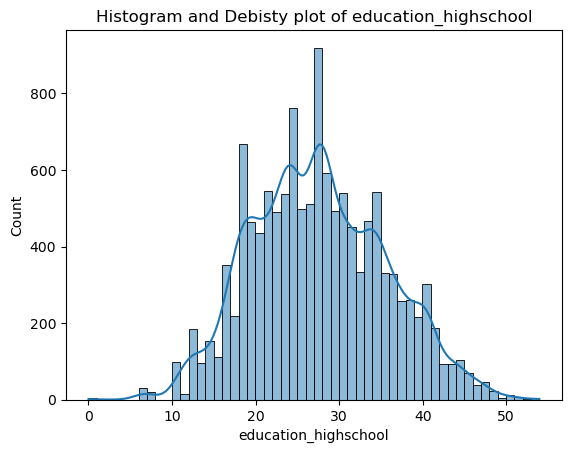

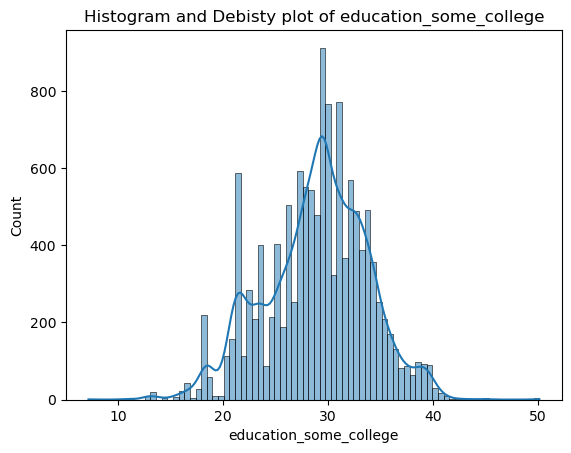

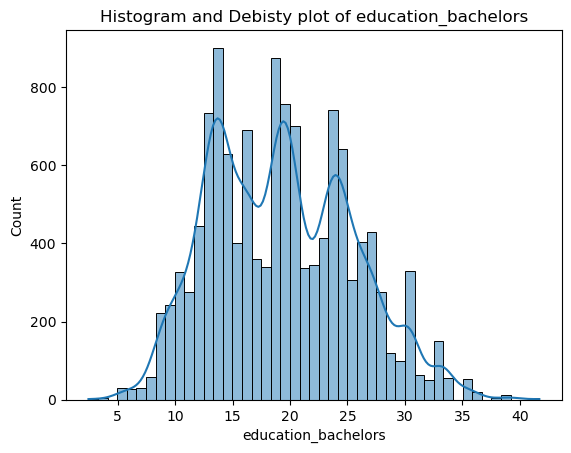

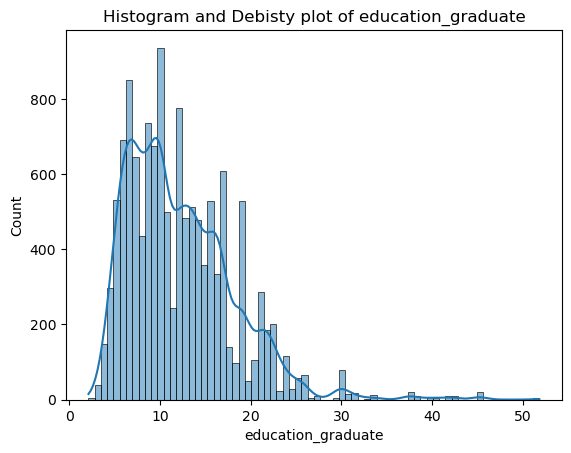

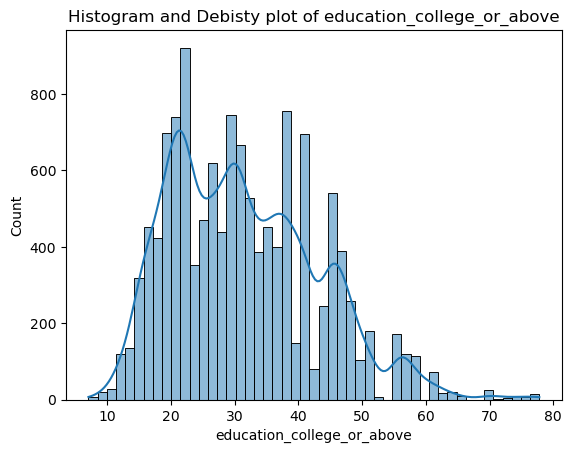

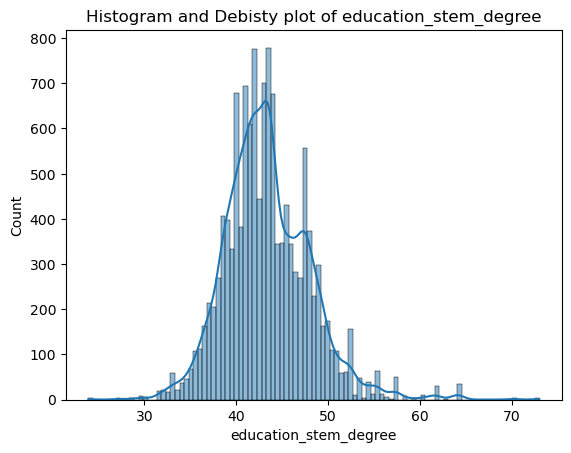

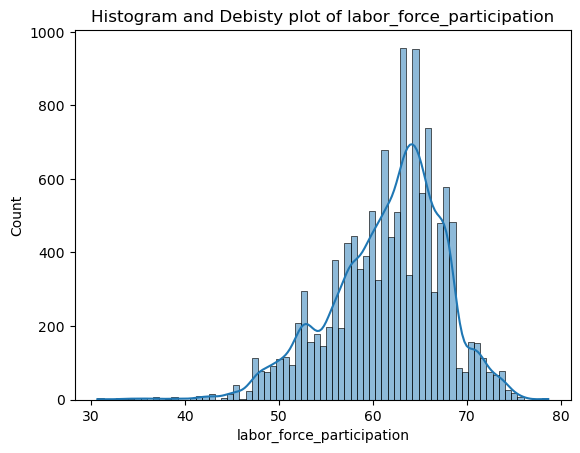

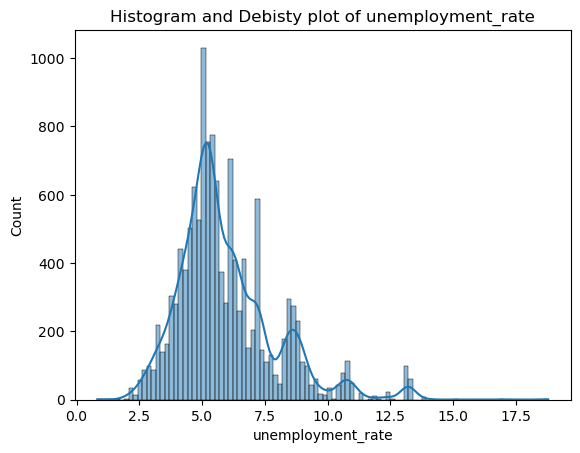

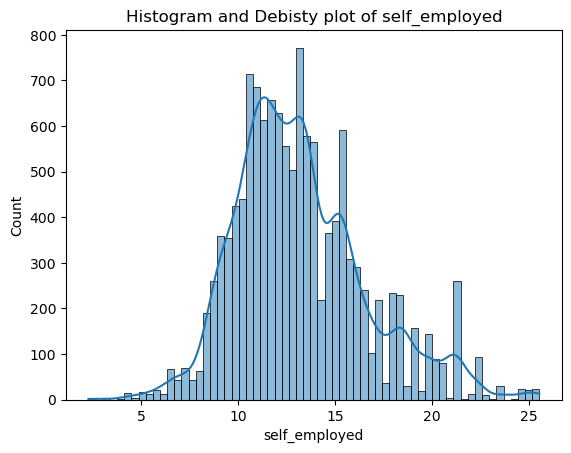

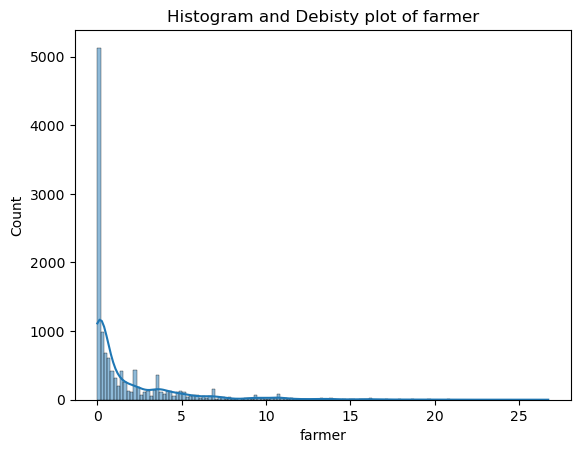

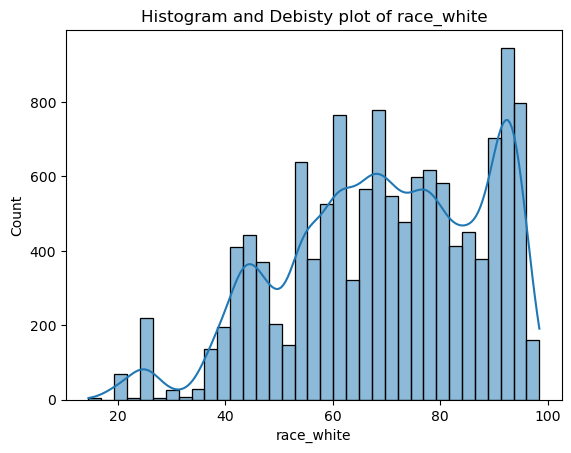

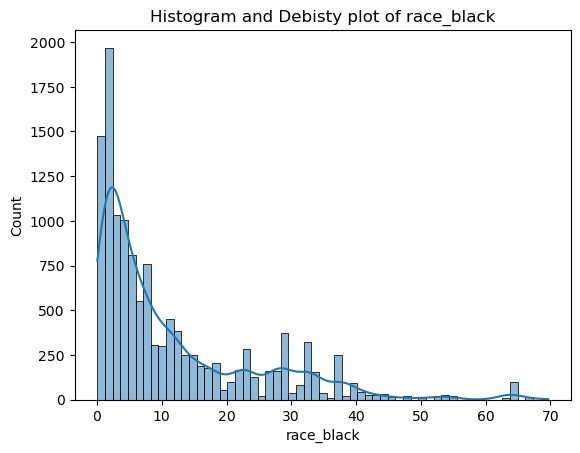

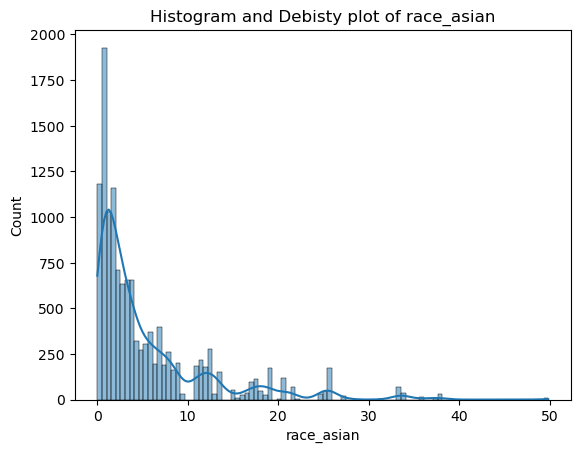

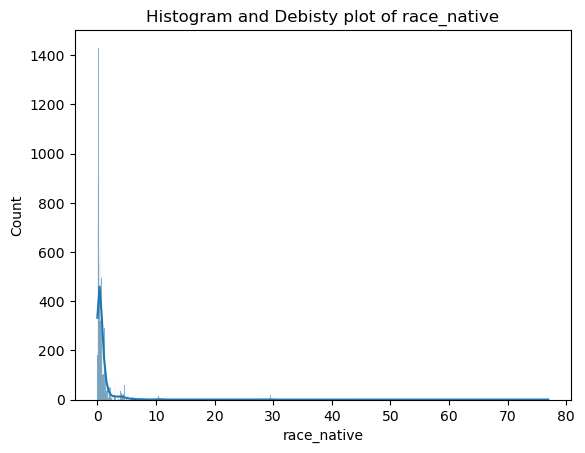

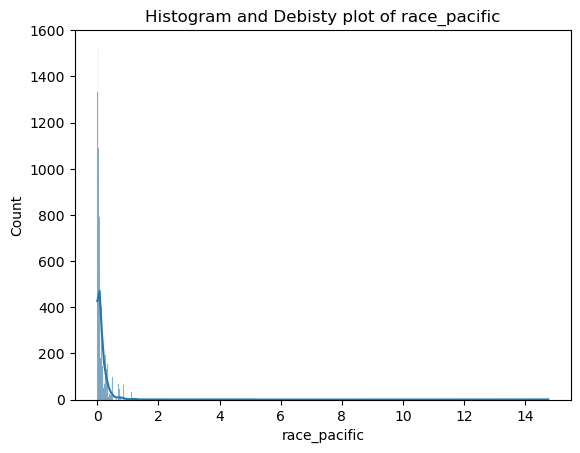

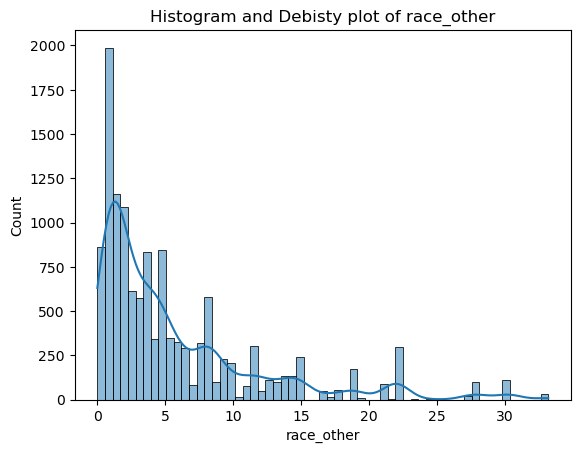

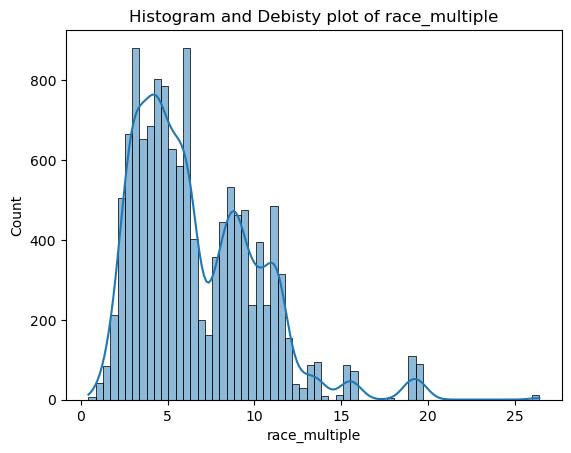

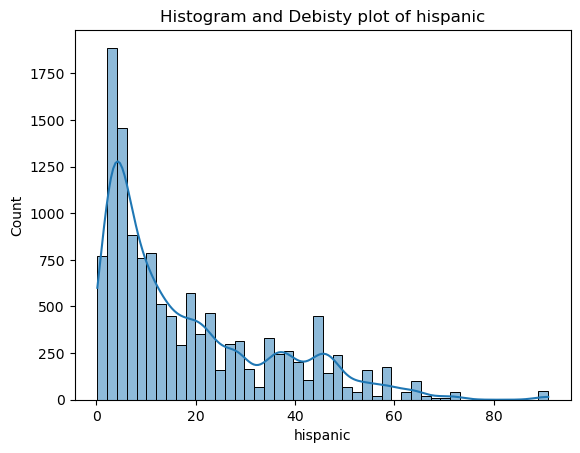

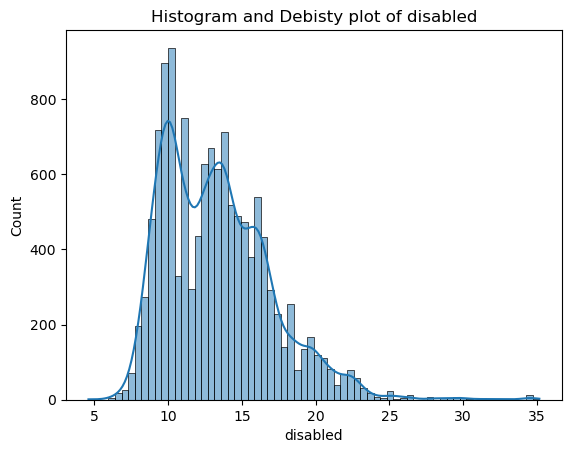

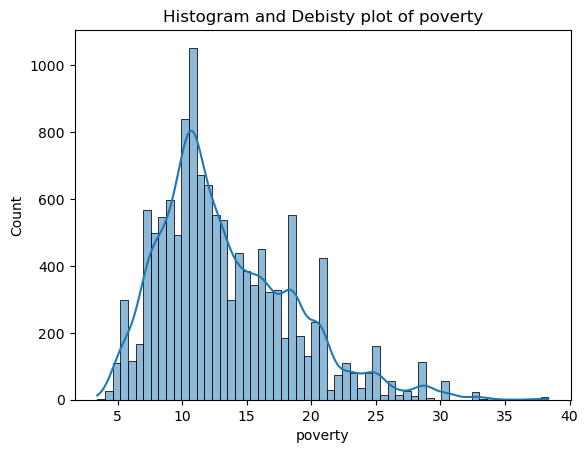

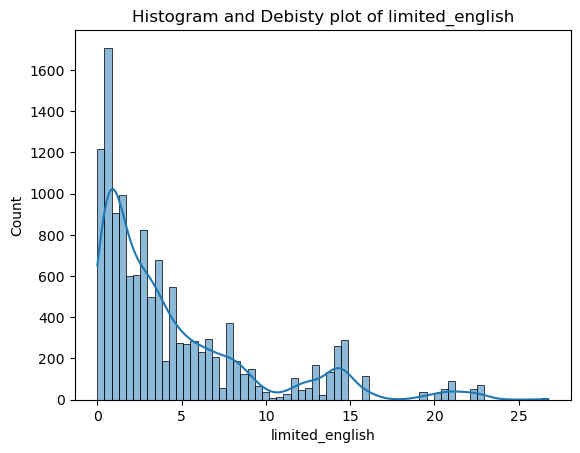

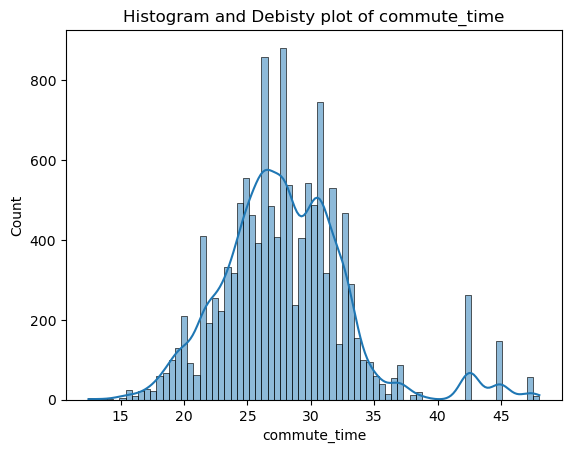

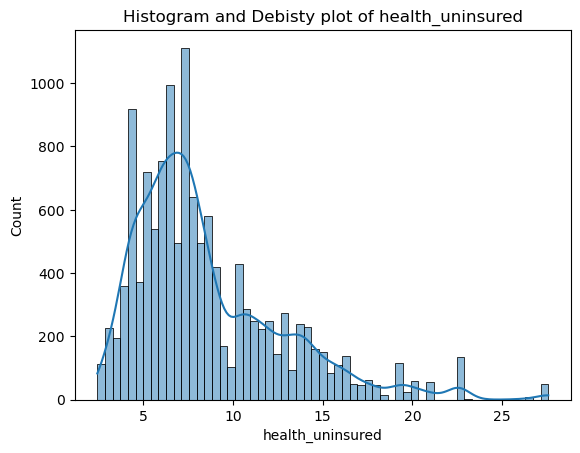

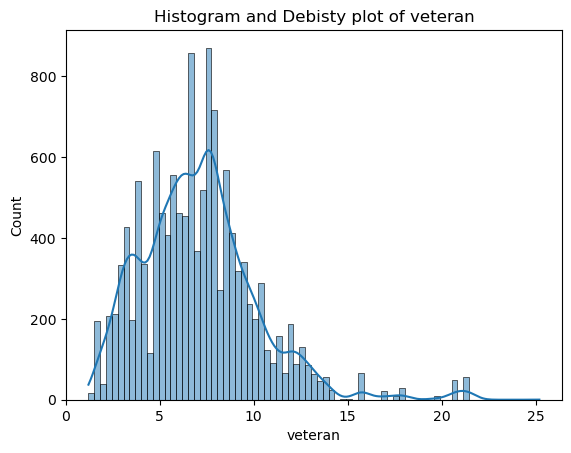

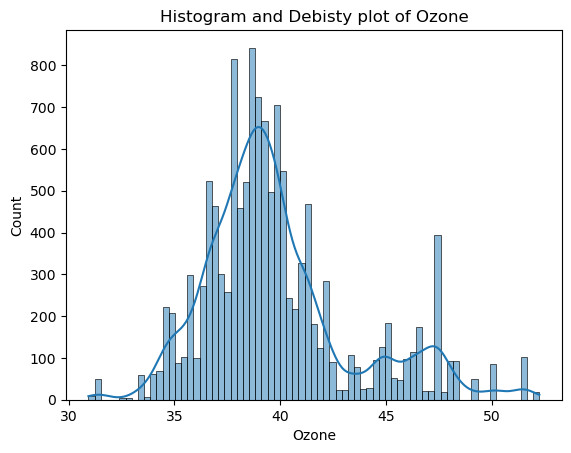

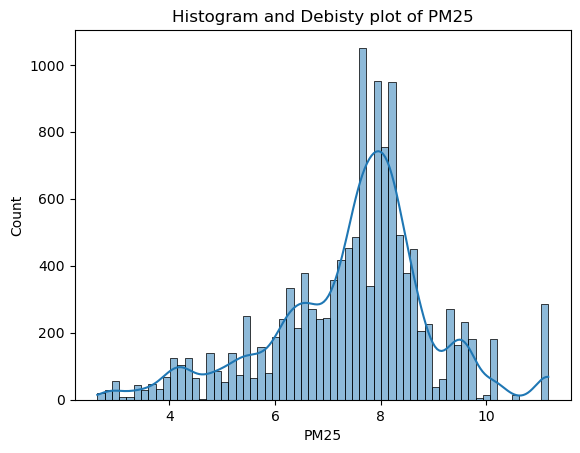

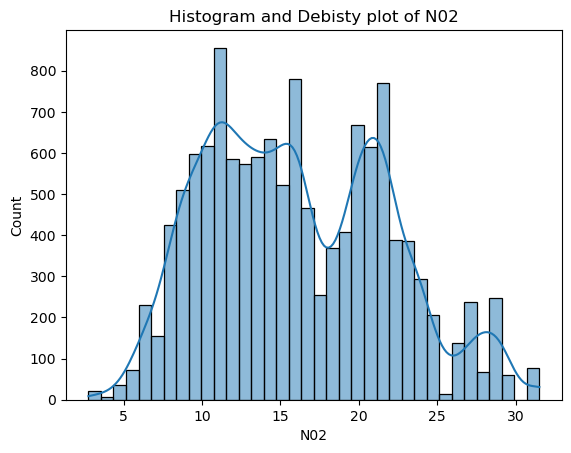

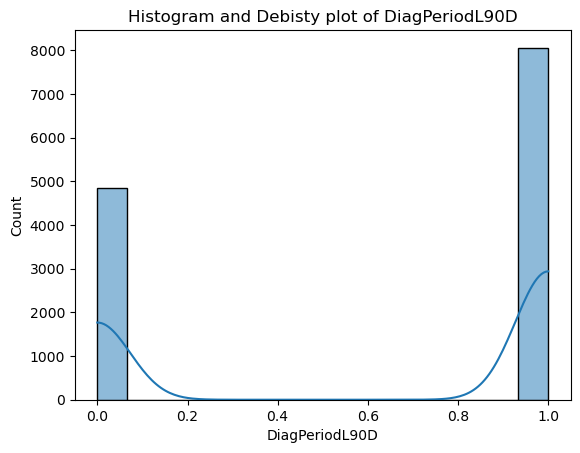

In [22]:
for col in df.select_dtypes(include=['number']).columns:
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram and Debisty plot of {col}")
  plt.show()

In [2]:
df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
count,5792.000000,5792.000000,5792.000000,1777.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,...,5792.000000,5792.000000,5791.000000,5791.000000,5792.000000,5792.000000,5792.000000,5778.000000,5778.000000,5778.000000
mean,549946.787983,570.217887,59.274862,28.900073,20266.872152,1510.471786,40.575472,11.119250,12.919191,13.218348,...,18.036444,13.483574,13.435855,4.292997,27.915686,8.636586,7.171897,39.788771,7.435363,15.936645
std,260988.833446,275.314510,13.076323,5.609491,13694.738314,2883.409750,4.029852,1.478579,1.909698,3.294389,...,16.716396,3.693358,5.105505,4.673928,4.997893,4.142770,3.107104,3.486773,1.528655,5.894659
min,100266.000000,101.000000,18.000000,14.000000,829.515152,0.821739,20.600000,0.000000,6.314286,5.925000,...,0.194444,4.600000,3.433333,0.000000,13.722078,2.440000,1.200000,30.939316,2.636008,2.760371
25%,320284.500000,329.000000,50.000000,24.600000,8863.550000,161.925000,37.190476,10.160000,11.726471,10.996226,...,4.698529,10.388889,9.995000,0.878049,24.932500,5.772727,5.078571,37.722740,6.590523,11.100666
50%,553042.000000,554.000000,59.000000,28.150000,18711.016665,626.236667,40.640909,11.039216,12.923944,12.531646,...,11.842623,13.093333,12.218182,2.690196,27.561905,7.468000,7.070370,39.127948,7.666953,15.246437
75%,778552.250000,836.000000,67.000000,32.860000,28996.772730,1612.851111,43.085938,12.143396,13.904830,14.937500,...,27.594872,15.802128,16.444444,5.863830,30.709375,10.820000,8.774510,41.075217,8.276922,20.348878
max,999890.000000,996.000000,91.000000,43.900000,71374.131580,21172.000000,54.570000,16.481818,35.300000,62.100000,...,91.005085,35.155556,38.347826,22.591667,48.020000,27.566102,21.426667,52.237210,11.169408,31.504775


In [3]:
df.columns
df_types = df.dtypes
print(df_types)

patient_id            int64
patient_race         object
payer_type           object
patient_state        object
patient_zip3          int64
                     ...   
health_uninsured    float64
veteran             float64
Ozone               float64
PM25                float64
N02                 float64
Length: 82, dtype: object


In [4]:
df_missing_data = df.isnull().sum()
print("Missing data:\n", df_missing_data)

Missing data:
 patient_id             0
patient_race        2901
payer_type           760
patient_state         21
patient_zip3           0
                    ... 
health_uninsured       0
veteran                0
Ozone                 14
PM25                  14
N02                   14
Length: 82, dtype: int64


In [5]:
for col in df.select_dtypes(include='object').columns:
  print(f"Counts for {col}:\n{df[col].value_counts()}\n")

Counts for patient_race:
White       1606
Black        510
Hispanic     347
Other        273
Asian        155
Name: patient_race, dtype: int64

Counts for payer_type:
COMMERCIAL            2759
MEDICARE ADVANTAGE    1151
MEDICAID              1122
Name: payer_type, dtype: int64

Counts for patient_state:
CA    1047
TX     494
NY     471
IL     355
MI     337
OH     308
FL     282
GA     261
PA     231
VA     175
MN     172
CO     166
IN     150
KY     131
AZ     121
WI     100
NC      99
WA      87
OK      71
LA      70
NM      65
MO      65
SC      57
ID      51
TN      48
AR      34
IA      34
OR      34
MS      33
MD      28
MT      25
NV      25
NE      24
AL      23
KS      20
WV      18
HI      13
UT      12
DC       8
DE       8
NJ       7
SD       3
ND       3
WY       3
MA       1
AK       1
Name: patient_state, dtype: int64

Counts for patient_gender:
F    5792
Name: patient_gender, dtype: int64

Counts for breast_cancer_diagnosis_code:
1749      906
C50911    817
C50912    7

In [6]:
df = pd.read_csv("training.csv")

columns_to_exclude = ["patient_race", "patient_gender", "payer_type", "breast_cancer_diagnosis_code",
                      "metastatic_cancer_diagnosis_code", "breast_cancer_diagnosis_desc",
                      "metastatic_first_novel_treatment", "metastatic_first_novel_treatment_type"]

df2 = df.drop(columns=columns_to_exclude)

In [7]:
for col in df2.select_dtypes(include='object').columns:
  print(f"Counts for {col}:\n{df2[col].value_counts()}\n")

Counts for patient_state:
CA    2438
TX    1155
NY    1041
MI     858
IL     782
OH     754
FL     609
GA     551
PA     483
MN     377
CO     371
VA     365
IN     317
KY     259
AZ     229
WI     212
WA     200
NC     186
MO     160
NM     141
LA     139
TN     112
SC     110
ID      93
OK      93
OR      89
IA      86
MS      76
MD      71
AR      63
NV      62
KS      50
AL      50
MT      45
NE      40
UT      36
DE      33
WV      27
HI      21
NJ      21
DC      20
SD       8
ND       6
AK       6
WY       4
CT       2
PR       1
RI       1
NH       1
MA       1
Name: patient_state, dtype: int64

Counts for Region:
South        3919
West         3735
Midwest      3650
Northeast    1550
Name: Region, dtype: int64

Counts for Division:
East North Central    2923
Pacific               2754
South Atlantic        1972
Middle Atlantic       1545
West South Central    1450
Mountain               981
West North Central     727
East South Central     497
New England              5
Name: 

In [8]:
state_mapping = {
    "AL": 0, "AK": 1, "AZ": 2, "AR": 3, "CA": 4,
    "CO": 5, "CT": 6, "DE": 7, "FL": 8, "GA": 9,
    "HI": 10, "ID": 11, "IL": 12, "IN": 13, "IA": 14,
    "KS": 15, "KY": 16, "LA": 17, "ME": 18, "MD": 19,
    "MA": 20, "MI": 21, "MN": 22, "MS": 23, "MO": 24,
    "MT": 25, "NE": 26, "NV": 27, "NH": 28, "NJ": 29,
    "NM": 30, "NY": 31, "NC": 32, "ND": 33, "OH": 34,
    "OK": 35, "OR": 36, "PA": 37, "RI": 38, "SC": 39,
    "SD": 40, "TN": 41, "TX": 42, "UT": 43, "VT": 44,
    "VA": 45, "WA": 46, "WV": 47, "WI": 48, "WY": 49
}
df2["patient_state_encoded"] = df2["patient_state"].map(state_mapping)

division_mapping = {
    "East North Central": 0, "Pacific": 1, "South Atlantic": 2, "Middle Atlantic": 3,
    "West South Central": 4, "Mountain": 5, "West North Central": 6, 
    "East South Central": 7, "New England": 8
}
df2["division_encoded"] = df2["Division"].map(division_mapping)

region_mapping = {"South": 0, "West": 1, "Midwest": 2, "Northeast": 3}
df2["region_encoded"] = df2["Region"].map(region_mapping)

df2 = df2.drop(columns=["patient_state", "Region", "Division"])
df2.head()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,patient_state_encoded,division_encoded,region_encoded
0,475714,924,84,NaN,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,...,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,4.0,1.0,1.0
1,349367,928,62,28.49,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,...,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,4.0,1.0,1.0
2,138632,760,43,38.09,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,...,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,42.0,4.0,0.0
3,617843,926,45,NaN,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,...,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,4.0,1.0,1.0
4,817482,836,55,NaN,10886.26000,116.886000,43.473469,10.824000,13.976000,9.492000,...,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,11.0,5.0,1.0


In [9]:
df3 = df2.drop(columns=["patient_id", "patient_zip3"])
df3.head()

,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,patient_state_encoded,division_encoded,region_encoded
0,84,NaN,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,...,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,4.0,1.0,1.0
1,62,28.49,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,...,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,4.0,1.0,1.0
2,43,38.09,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,...,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,42.0,4.0,0.0
3,45,NaN,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,...,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,4.0,1.0,1.0
4,55,NaN,10886.26000,116.886000,43.473469,10.824000,13.976000,9.492000,10.364000,12.600000,...,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,11.0,5.0,1.0


In [10]:
df_missing_data = df3.isnull().sum()
print("Missing data:\n", df_missing_data)

Missing data:
 patient_age                 0
bmi                      8965
population                  1
density                     1
age_median                  1
                         ... 
N02                        29
DiagPeriodL90D              0
patient_state_encoded      72
division_encoded           52
region_encoded             52
Length: 73, dtype: int64


In [11]:
df4 = df3.drop(columns=["bmi"])
df4.head()

,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,...,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D,patient_state_encoded,division_encoded,region_encoded
0,84,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,11.557143,...,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1,4.0,1.0,1.0
1,62,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,14.060606,...,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1,4.0,1.0,1.0
2,43,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,12.770000,...,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1,42.0,4.0,0.0
3,45,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,14.847619,...,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0,4.0,1.0,1.0
4,55,10886.26000,116.886000,43.473469,10.824000,13.976000,9.492000,10.364000,12.600000,14.992000,...,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0,11.0,5.0,1.0


In [12]:
df4 = df4.dropna()
X = df4.drop(columns=["DiagPeriodL90D"])
y = df4["DiagPeriodL90D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

probabilities = model.predict_proba(X_test)[:, 1]

print(probabilities)


[0.61886121 0.61875748 0.65324577 ... 0.60235047 0.63838836 0.60463342]


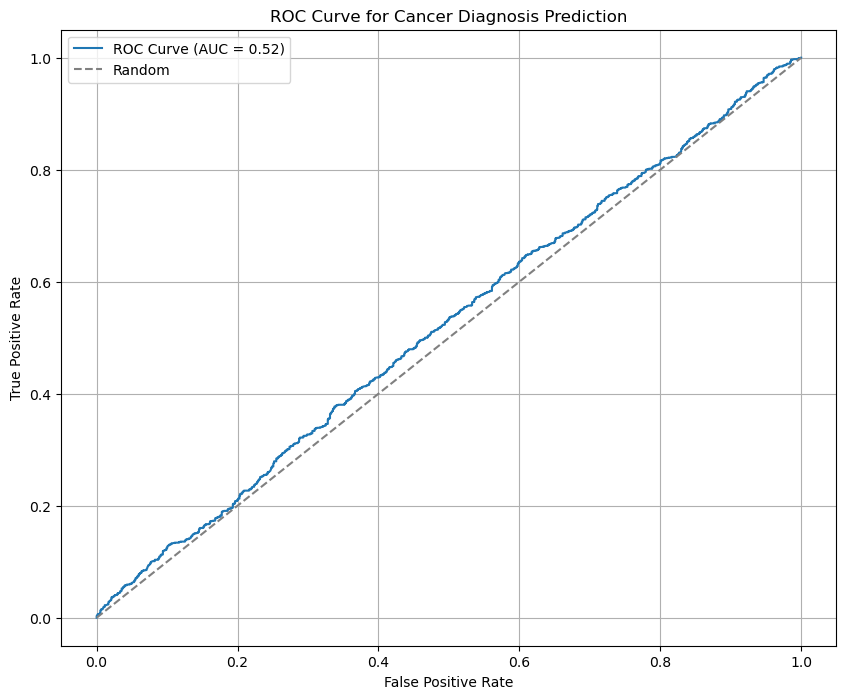

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

probabilities = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probabilities)

auc_score = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cancer Diagnosis Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
len(probabilities)

2561

In [15]:
#df4.to_csv("data1.csv", index = False) #12803 rows

In [16]:
num_columns = df4.shape[1]
print("Number of columns in df4:", num_columns)

Number of columns in df4: 72


In [17]:
column_probabilities = {}
for column in df4.columns.drop("DiagPeriodL90D"):
    X_column = df4[[column]]
    y_column = df4["DiagPeriodL90D"]
    
    model = LogisticRegression()
    model.fit(X_column, y_column)
    
    probabilities = model.predict_proba(X_column)[:, 1]
    
    column_probabilities[column] = probabilities[0]
    
for column, probability in column_probabilities.items():
    print(f"Column '{column}': Probability of 90-day diagnosis: {probability}")


Column 'patient_age': Probability of 90-day diagnosis: 0.6732954178207674
Column 'population': Probability of 90-day diagnosis: 0.6297977845132939
Column 'density': Probability of 90-day diagnosis: 0.625560853019552
Column 'age_median': Probability of 90-day diagnosis: 0.6259991849873342
Column 'age_under_10': Probability of 90-day diagnosis: 0.6082695173333592
Column 'age_10_to_19': Probability of 90-day diagnosis: 0.6152211861432569
Column 'age_20s': Probability of 90-day diagnosis: 0.6286148073840607
Column 'age_30s': Probability of 90-day diagnosis: 0.6289493890404825
Column 'age_40s': Probability of 90-day diagnosis: 0.620748322533362
Column 'age_50s': Probability of 90-day diagnosis: 0.6312753051801524
Column 'age_60s': Probability of 90-day diagnosis: 0.6264264719154923
Column 'age_70s': Probability of 90-day diagnosis: 0.6276661283852855
Column 'age_over_80': Probability of 90-day diagnosis: 0.6320993404150171
Column 'male': Probability of 90-day diagnosis: 0.623960022660782
Co

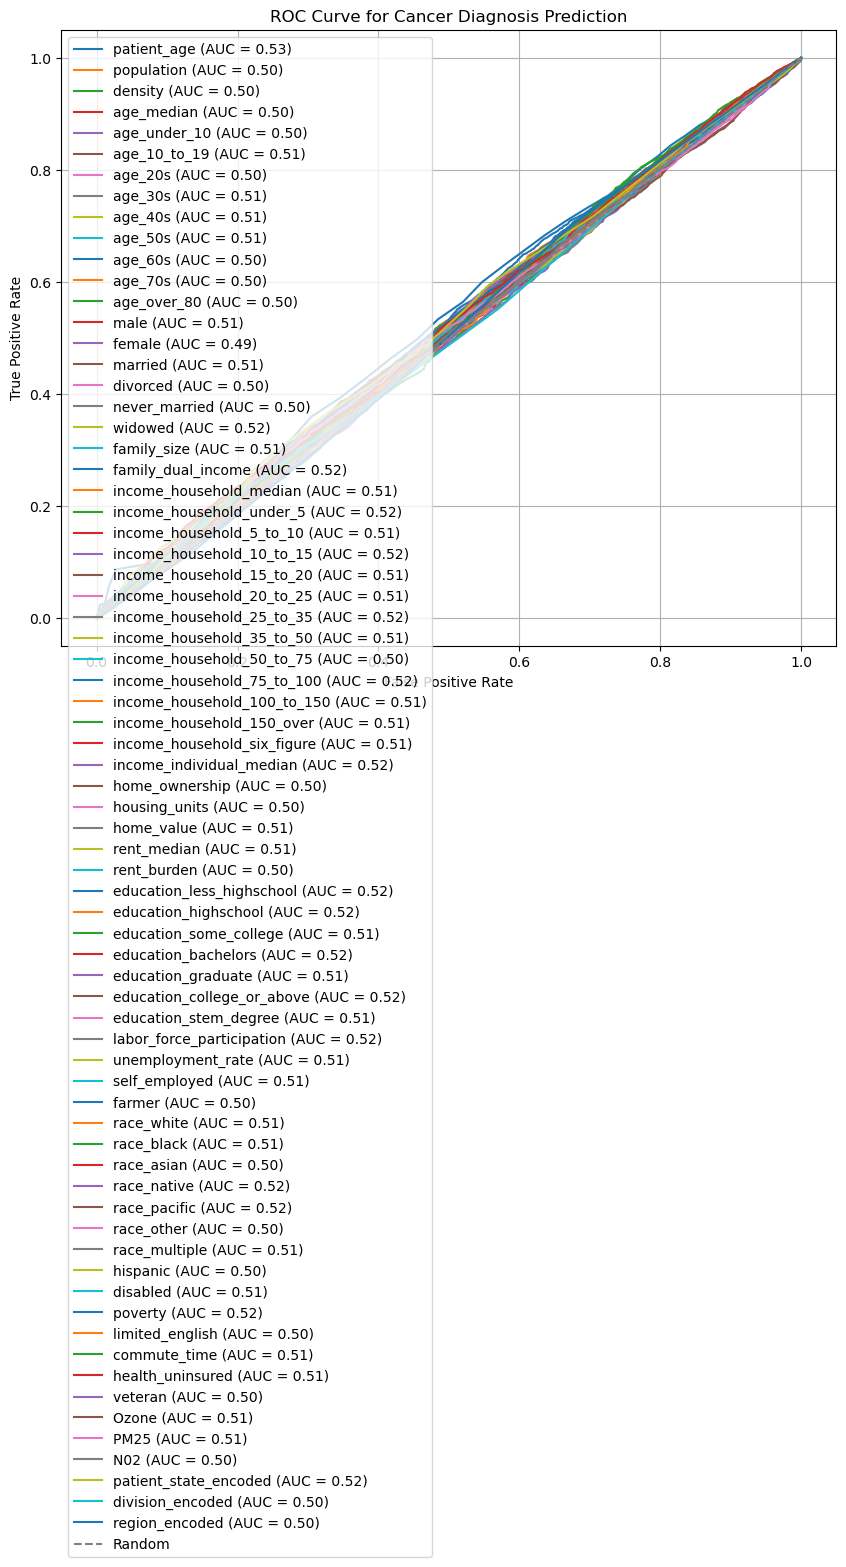

In [18]:
roc_data = {}

for column in df4.columns.drop("DiagPeriodL90D"):
    X_column = df4[[column]]
    y_column = df4["DiagPeriodL90D"]
    
    model = LogisticRegression()
    model.fit(X_column, y_column)
    
    probabilities = model.predict_proba(X_column)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_column, probabilities)
    
    auc_score = auc(fpr, tpr)
    
    roc_data[column] = {'fpr': fpr, 'tpr': tpr, 'auc': auc_score}

plt.figure(figsize=(10, 8))
for column, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f"{column} (AUC = {data['auc']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cancer Diagnosis Prediction')
plt.legend()
plt.grid(True)
plt.show()


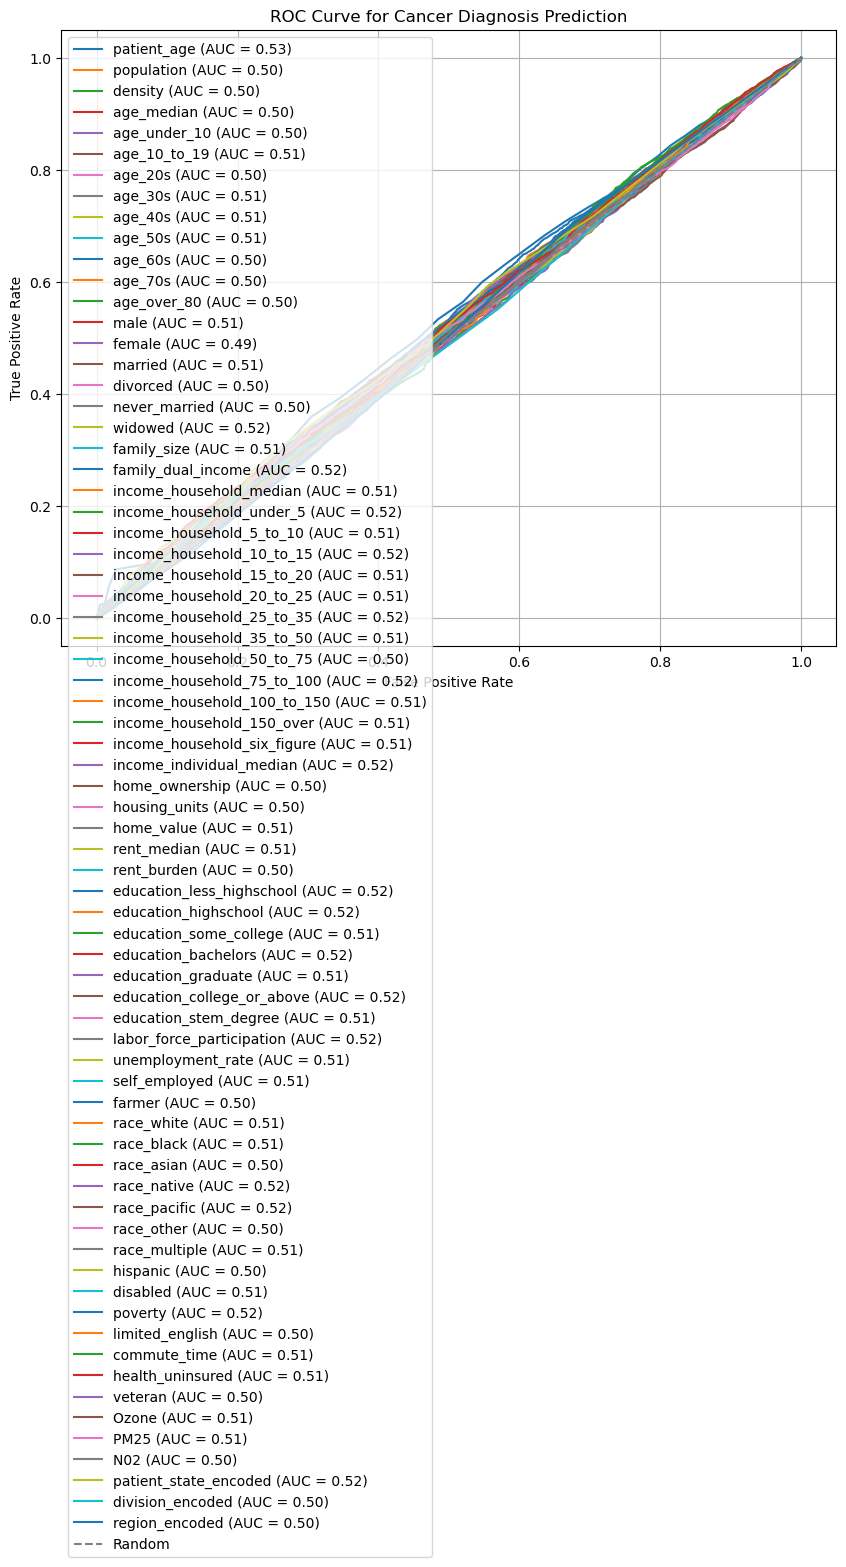

In [19]:
roc_data = {}

for column in df4.columns.drop("DiagPeriodL90D"):
    X_column = df4[[column]]
    y_column = df4["DiagPeriodL90D"]
    
    model = LogisticRegression()
    model.fit(X_column, y_column)
    
    probabilities = model.predict_proba(X_column)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_column, probabilities)
    
    auc_score = auc(fpr, tpr)
    
    roc_data[column] = {'fpr': fpr, 'tpr': tpr, 'auc': auc_score}

plt.figure(figsize=(10, 8))
for column, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f"{column} (AUC = {data['auc']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cancer Diagnosis Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
X = df4.drop(columns=["DiagPeriodL90D"])
y = df4["DiagPeriodL90D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5509566575556424
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.38      0.39       957
           1       0.64      0.65      0.65      1604

    accuracy                           0.55      2561
   macro avg       0.52      0.52      0.52      2561
weighted avg       0.55      0.55      0.55      2561



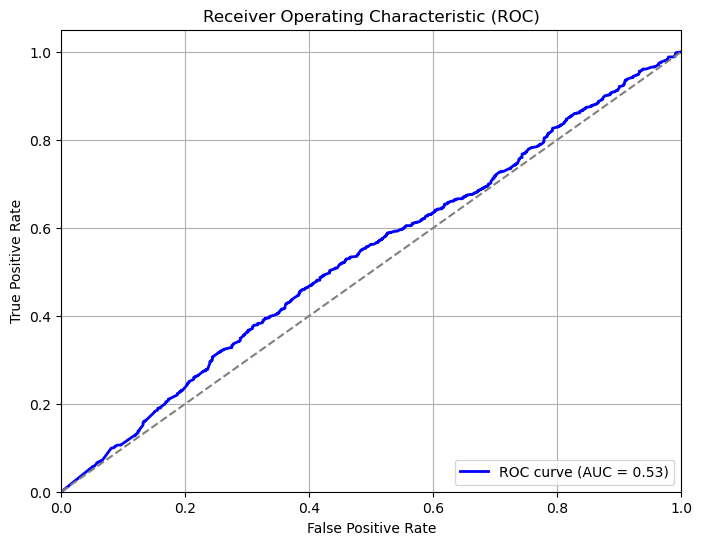

In [21]:
y_prob = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
